In [6]:
from geostat import GP, Model, Featurizer, Parameters
import geostat.kernel as krn
import matplotlib.pyplot as plt
import numpy as np

In [8]:
x = np.linspace(-8, 8, 321)[:, np.newaxis]
 
locs = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4], dtype=float)[:, np.newaxis]
obs = np.array([-2, -2, -2, -1, 0, 1, 2, 2, 2], dtype=float)

featurizer = Featurizer(lambda x: (1., x))
featurizer2 = Featurizer(lambda x: (1.,))

p = Parameters(alpha=0.25)
kernel = krn.TrendPrior(featurizer, alpha=p.alpha) + krn.Noise(0.25)
model = Model(GP(0, kernel)).fit(locs, obs, iters=500)
mu1, _ = model.predict(x)

p = Parameters(range=0.33, sill=1.)
kernel = krn.SquaredExponential(range=p.range, sill=p.sill) + krn.Noise(0.25)
model = Model(GP(0, kernel)).fit(locs, obs, iters=500)
mu2, _ = model.predict(x)

p = Parameters(alpha=0.25, sill=1.)
kernel = krn.TrendPrior(featurizer2, alpha=p.alpha) \
       + krn.Constant(sill=p.sill) \
       * krn.Wiener(axis=0, start=-4) + krn.Noise(nugget=0.25)
model = Model(GP(0, kernel)).fit(locs, obs, iters=500)
mu3, _ = model.predict(x)

[iter    50 ll -9.88 time  0.43 reg  0.00 alpha  0.21]
[iter   100 ll -9.88 time  0.23 reg  0.00 alpha  0.21]
[iter   150 ll -9.88 time  0.23 reg  0.00 alpha  0.21]
[iter   200 ll -9.88 time  0.23 reg  0.00 alpha  0.21]
[iter   250 ll -9.88 time  0.23 reg  0.00 alpha  0.21]
[iter   300 ll -9.88 time  0.23 reg  0.00 alpha  0.21]
[iter   350 ll -9.88 time  0.23 reg  0.00 alpha  0.21]
[iter   400 ll -9.88 time  0.23 reg  0.00 alpha  0.21]
[iter   450 ll -9.88 time  0.23 reg  0.00 alpha  0.21]
[iter   500 ll -9.88 time  0.23 reg  0.00 alpha  0.21]
[iter    50 ll -16.37 time  0.50 reg  0.00 sill  1.54 range  0.59]
[iter   100 ll -13.03 time  0.21 reg  0.00 sill  1.72 range  1.09]
[iter   150 ll -10.63 time  0.21 reg  0.00 sill  1.75 range  1.85]
[iter   200 ll -9.75 time  0.21 reg  0.00 sill  1.93 range  2.56]
[iter   250 ll -9.57 time  0.21 reg  0.00 sill  2.25 range  2.91]
[iter   300 ll -9.52 time  0.21 reg  0.00 sill  2.55 range  3.03]
[iter   350 ll -9.50 time  0.20 reg  0.00 sill  2.7

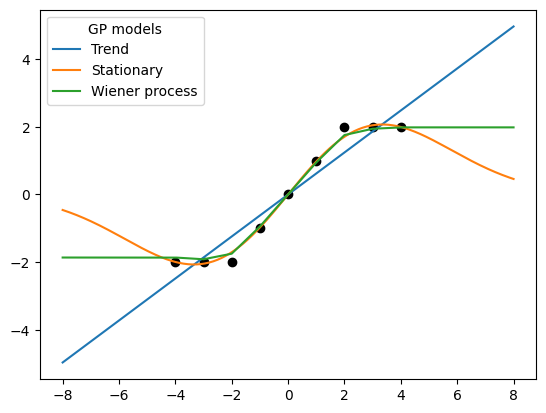

In [9]:
plt.scatter(locs[:, 0], obs, marker='o', color='black')
plt.plot(x[:, 0], mu1, label='Trend')
plt.plot(x[:, 0], mu2, label='Stationary')
plt.plot(x[:, 0], mu3, label='Wiener process')
plt.legend(title='GP models')